## Session 6

#### Spark Job Submission:
   - Cover the Spark API for writing self-contained programs 
     - As opposed to using the Spark Shell
   - Write and compile standalone Spark applications 
   - Submit applications to Spark
- #### Creating StandAlone Application
- #### Core API
  -  We've been using the Spark Shell 
     - Stand-alone
     - Or connecting to cluster
  - Shell is great for
     - Ad-hoc / interactive
     - Developing apps / Debugging
- For production code, want an actual application 
  - Main difference 
    - you create a SparkSession
    - Instead of using pre-created session in shell
    - Fairly simple using some boilerplate code
- Can be in Scala / Python / Java

- #### Building and Running Applications
- #### Application Lifecycle
- #### Cluster Manager
- #### Logging and Debugging

##### Basic Code for Client(Driver)
- Create program
  - To create a basic SparkSession [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.html), just use SparkSession.builder().
  - Configure the session
  - Create the session
- Common builder methods:
  - appName(name,str)
  - master(master,url/(str))
  - config(key:str,value:str)
  - enableHiveSupport()
  - getOrCreate()
- The Spark shell auto-imported some of the core API for us.
- Now that we'rewriting a program separately from the Sparkshell,we need to import any types we need, as in any other program.
- Master URL Variants[master Url](https://spark.apache.org/docs/3.3.1/submitting-applications.html#master-urls)
  - The master URL passed to Spark can be in one of the following formats:
    - **local**: Run Spark locally with one worker thread (i.e. no parallelism at all). 
    - **local[K]**: Run Spark locally with K worker threads (ideally, set this to the number of cores on your machine).
    - **local[K,F]**:	Run Spark locally with K worker threads and F maxFailures (see spark.task.maxFailures for an explanation of this variable).
    - **local[*]**:	Run Spark locally with as many worker threads as logical cores on your machine.
    - **spark://HOST:PORT**: Connect to the given Spark standalone cluster master. The port must be whichever one your master is configured to use, which is 7077 by default.
    - **mesos://HOST:PORT**:	Connect to the given Mesos cluster. The port must be whichever one your is configured to use, which is 5050 by default. Or, for a Mesos cluster using ZooKeeper, use mesos://zk://.... To submit with --deploy-mode cluster, the HOST:PORT should be configured to connect to the MesosClusterDispatcher.
    -  **yarn**:	Connect to a YARN cluster in client or cluster mode depending on the value of --deploy-mode. The cluster location will be found based on the HADOOP_CONF_DIR or YARN_CONF_DIR variable.
    - **k8s://HOST:PORT** :	Connect to a Kubernetes cluster in client or cluster mode depending on the value of --deploy-mode. The HOST and PORT refer to the Kubernetes API Server. It connects using TLS by default. In order to force it to use an unsecured connection, you can use k8s://http://HOST:PORT.


import org.apache.spark.sql.SparkSession
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

##### SparkSession Vs SparkContext:
 -  Since earlier versions of Spark or Pyspark, SparkContext (JavaSparkContext for Java) is an entry point to Spark programming with RDD and to connect to Spark Cluster, Since Spark 2.0 SparkSession has been introduced and became an entry point to start programming with DataFrame and Dataset.
 - SparkContext used to programmatically create Spark RDD, accumulators and broadcast variables on the cluster.
 

from pyspark import SparkContext, SparkConf
conf=SparkConf().setAppName("first_spark_app").setMaster("local")
sc=SparkContext(conf=conf)

##### Spark Configuration :[SparkProperties](https://spark.apache.org/docs/3.3.1/configuration.html#spark-properties)
- Spark provides three locations to configure the system:

  - **Spark properties** control most application parameters and can be set by using a SparkConf object, or through Java system properties.
    - These properties can be set directly on a SparkConf passed to your SparkContext. SparkConf allows you to configure some of the common properties (e.g. master URL and application name), as well as arbitrary key-value pairs through the set() method.
    - Properties that specify some time duration should be configured with a unit of time. The following format is accepted:

      - 25ms (milliseconds)
      - 5s (seconds)
      - 10m or 10min (minutes)
      - 3h (hours)
      - 5d (days)
      - 1y (years)
    - Properties that specify a byte size should be configured with a unit of size. The following format is accepted:

      - 1b (bytes)
      - 1k or 1kb (kibibytes = 1024 bytes)
      - 1m or 1mb (mebibytes = 1024 kibibytes)
      - 1g or 1gb (gibibytes = 1024 mebibytes)
      - 1t or 1tb (tebibytes = 1024 gibibytes)
      - 1p or 1pb (pebibytes = 1024 tebibytes)  
  - **Environment variables** can be used to set per-machine settings, such as the IP address, through the conf/spark-env.sh script on each node.
  - **Logging** can be configured through log4j2.properties.

##### Dynamically Loading Spark Properties: 
 - To avoid hard-coding certain configurations in a SparkConf.
 - If you’d like to run the same application with different masters or different amounts of memory.
 - Spark allows you to simply create an empty conf:
     - sc=SparkContext(SparkConf())
  - Then, you can supply configuration values at runtime:

./bin/spark-submit --name "My app" --master local[4] --conf spark.eventLog.enabled=false
  --conf "spark.executor.extraJavaOptions=-XX:+PrintGCDetails -XX:+PrintGCTimeStamps" myApp.jar
- The Spark shell and spark-submit tool support two ways to load configurations dynamically. The first is command line options, such as --master, as shown above. spark-submit can accept any Spark property using the --conf/-c flag, but uses special flags for properties that play a part in launching the Spark application. Running ./bin/spark-submit --help will show the entire list of these options.  
##### Viewing Spark Properties:
 - The application web UI at http://(driver):4040 lists Spark properties in the “Environment” tab. This is a useful place to check to make sure that your properties have been set correctly.
 - Use this command to check all configuration "**sc._conf.getAll()**" 
 -  spark-submit reads config options in the file (spark)/conf/spark-defaults.conf for
 -  In standard key=value properties file format – Precedence order (highest to lowest):
    1. Properties set directly on Builder 
    2. props passed to spark-submit
    3. spark-defaults.conf   

##### Lab.1:Spark Job Submission
- In this lab, we'll write a standalone job, and run it on the cluster
- Tasks 
  - Shut down the spark shell if its running
  - Type ctrl-D or quit() at prompt
- Finish the Standalone Program
- Python: Open (lab-root) /src/main/python/ProcessFiles.py with a simple editor. 
    - Look for the // TODO comments , and do the following:
    - Finish the imports by importing SparkSession and the functions in Spark SQL.
    - Create a SparkSession, and call the app "MyApp". Create a DataFrame from the file args.
    - Count the number of elements in the DataFrame.

In [ ]:
import sys
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
print("This is the name of the program:", sys.argv[0])
if __name__ == "__main__":
    if len(sys.argv) < 2:
        print ("need file(s) to load")
        sys.exit()
     # DONE: Create a SparkSession
    spark = SparkSession.builder.appName("Process Files").getOrCreate() 
    # Loop through file names, skipping the first arg (name of program)
    iterfiles = iter(sys.argv)
    next(iterfiles)
    for file in iterfiles:
        # DONE: create a DataFrame from the file (assume it is text)
        fileDF = spark.read.text(file)
        # DONE: count # of elements in the dataframe.
        count =  fileDF.count()
        print("### %s: count:  %s " % (file,count))
        # Do this so the 4040 UI stays alive - bit of a hack, but useful for us.
        print ("Hit ^C to terminate the program...:")
        response = input(">>>")
        #spark.stop()
    

In [1]:
!./sbin/start-master.sh
!./sbin/start-worker.sh master-url
!./bin/spark-submit  --master spark://Kirtis-MBP.attlocal.net:7077 --executor-memory 2g  /Users/kirtikamerkar/Downloads/spark-labs/solutionsPython/Session06/Lab06.1/src/main/python/ProcessFiles.py /Users/kirtikamerkar/Downloads/spark-labs/data/twinkle/500M.data


zsh:1: no such file or directory: ./sbin/start-master.sh
zsh:1: no such file or directory: ./sbin/start-worker.sh
zsh:1: no such file or directory: ./bin/spark-submit


In [ ]:
import sys
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
print("This is the name of the program:", sys.argv[0])
if __name__ == "__main__":
    if len(sys.argv) < 2:
        print ("need file(s) to load")
        sys.exit()
     # DONE: Create a SparkSession
    spark = SparkSession.builder.appName("Process Files").getOrCreate() 
    # Loop through file names, skipping the first arg (name of program)
    iterfiles = iter(sys.argv)
    next(iterfiles)
    for file in iterfiles:
        # DONE: create a DataFrame from the file (assume it is text)
        githubDF = spark.read.json(file)
        scanQuery=githubDF.groupBy('actor.login').count().orderBy('count',ascending=False)
        # DONE: count # of elements in the dataframe.
        count = scanQuery.count()
        print("### %s: count:  %s " % (file,count))
        out=scanQuery.show()
        print(out)
        # Do this so the 4040 UI stays alive - bit of a hack, but useful for us.
        print ("Hit ^C to terminate the program...:")
        response = input(">>>")
        #spark.stop()

#### Spark On YARN Architecture:
- #### What is YARN(Yet Another Resource Negotiator)?
   - YARN is essentially a system for managing distributed applications. It consists of a central ResourceManager(purely scheduler), which arbitrates all available cluster resources, and a per-node NodeManager, which takes direction from the ResourceManager and is responsible for managing resources available on a single node.
-  Node Manager acts as slave for the ResourceManager.
- Yarn NodeManager is the processing service that is tied to the slave node.
- NM communicates all the available data processing resources to the Yarn ResourceManager.

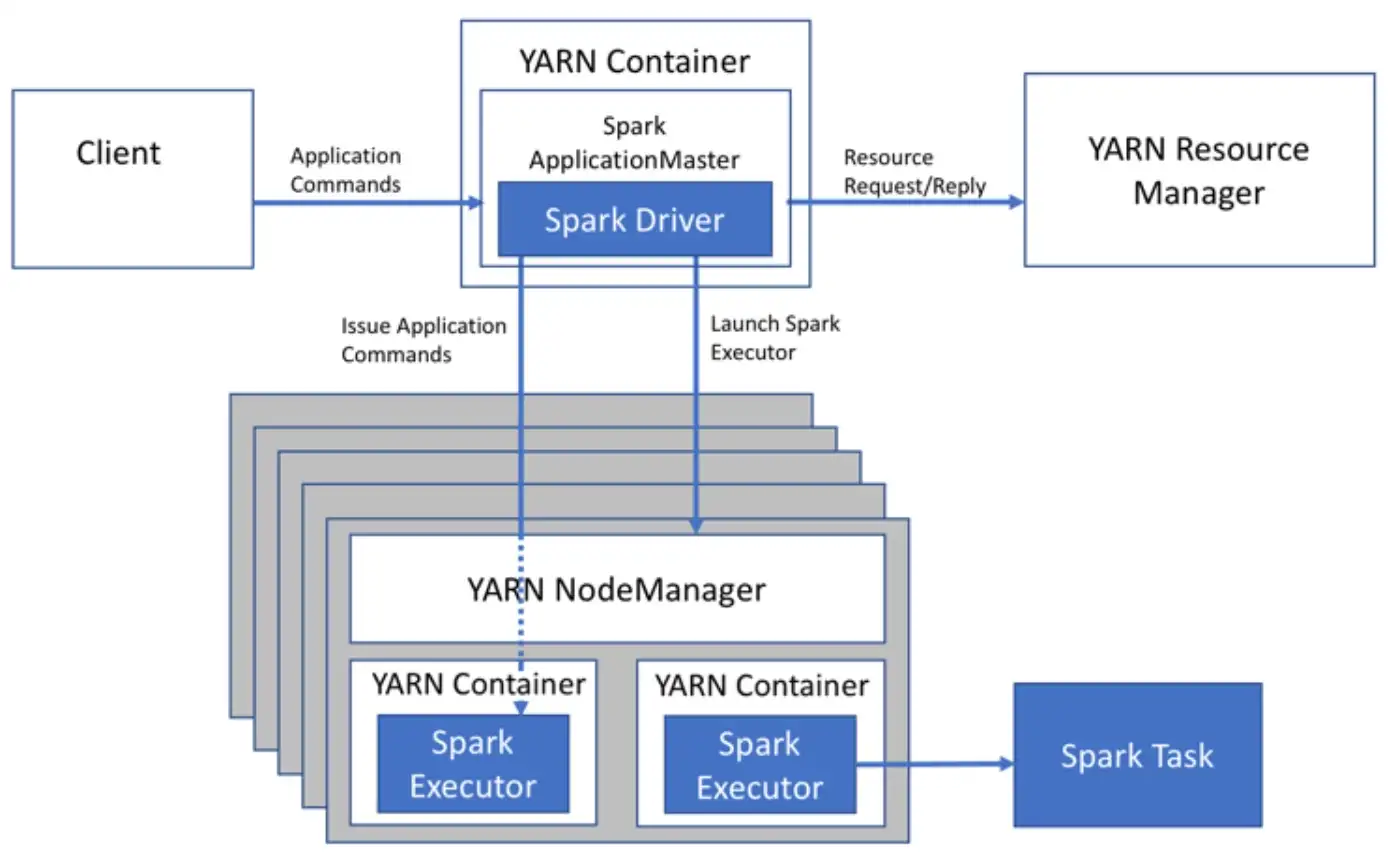

#### Walk through an application execution sequence In YARN (steps are illustrated in the diagram):

1. A client program submits the application, including the necessary specifications to launch the application-specific ApplicationMaster itself.
2. The ResourceManager assumes the responsibility to negotiate a specified container in which to start the ApplicationMaster and then launches the ApplicationMaster.
3. The ApplicationMaster, on boot-up, registers with the ResourceManager – the registration allows the client program to query the ResourceManager for details, which allow it to  directly communicate with its own ApplicationMaster.
4. During normal operation the ApplicationMaster negotiates appropriate resource containers via the resource-request protocol.
5. On successful container allocations, the ApplicationMaster launches the container by providing the container launch specification to the NodeManager. The launch specification, typically, includes the necessary information to allow the container to communicate with the ApplicationMaster itself.
6. The application code executing within the container then provides necessary information (progress, status etc.) to its ApplicationMaster via an application-specific protocol.
7. During the application execution, the client that submitted the program communicates directly with the ApplicationMaster to get status, progress updates etc. via an application-specific protocol.
8. Once the application is complete, and all necessary work has been finished, the ApplicationMaster deregisters with the ResourceManager and shuts down, allowing its own container to be repurposed.

#### Running Spark Jobs on YARN:
- Each Spark executor runs as a YARN container.The Container is the resource allocation, which is the successful result of the ResourceManager granting a specific ResourceRequest. A Container grants rights to an application to use a specific amount of resources (memory, cpu etc.) on a specific host.
- Where MapReduce schedules a container and fires up a JVM for each task, Spark hosts multiple tasks within the same container.
- Spark supports two modes for running on YARN:
   1. YARN-cluster mode
      - Suitable for production jobs
   2. YARN-client mode
      - Suitable for interactive and debugging uses where you want to see your application’s output immediately.
-  In YARN, each application instance has an Application Master process, which is the first container started for that application.
- The application is responsible for requesting resources from the ResourceManager, and, when allocated them, telling NodeManagers to start containers on its behalf.
- Application Masters obviate the need for an active client — the process starting the application can go away and coordination continues from a process managed by YARN running on the cluster.
- In yarn-cluster mode, the driver runs in the Application Master. This means that the same process is responsible for both driving the application and requesting resources from YARN, and this process runs inside a YARN container. The client that starts the app doesn’t need to stick around for its entire lifetime.
- The yarn-cluster mode,Spark applications that require user input, like spark-shell and PySpark, need the Spark driver to run inside the client process that initiates the Spark application.
- In yarn-client mode, the Application Master is merely present to request executor containers from YARN.
-  The client communicates with those containers to schedule work after they start.

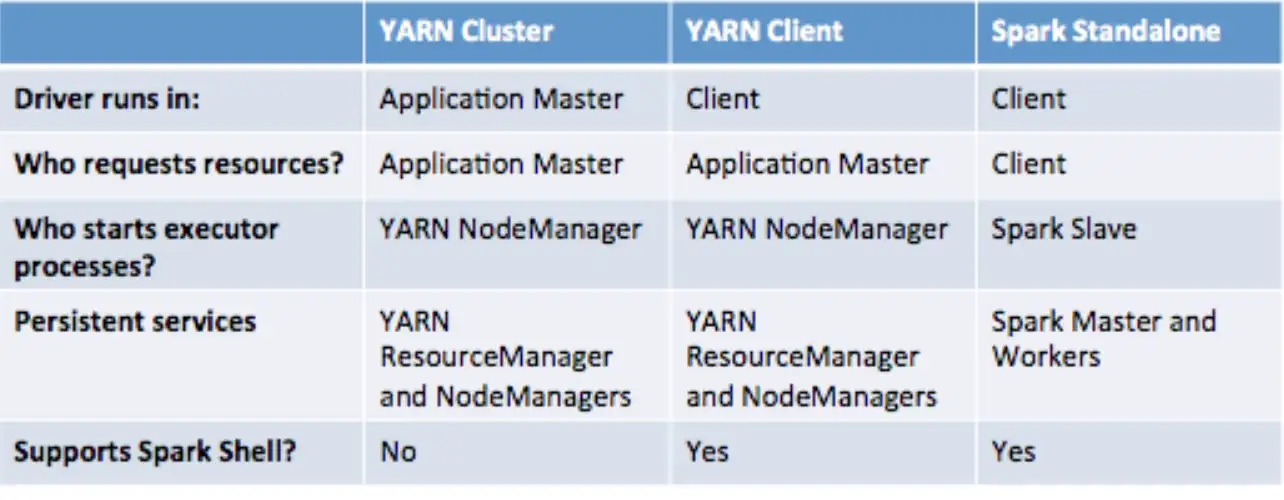

 #### Requirements and configuration:
- Need to have a working Hadoop/YARN system 
- Set environment variables
   - HADOOP_CONF_DIR or YARN_CONF_DIR to the client-side onfig dir of the Hadoop cluster
   - The config files are used to connect to the YARN resource manager
- Quite a few YARN-specific properties you can set 
   - e.g. spark.driver.cores: driver cores used in cluster mode
- Usage: master is yarn, and deploy mode one of the following.
  -  cluster: Spark driver runs inside an app master process managed by YARN on the cluster
  -  client: Driver runs in a client process - app master just used for resource allocation

In [ ]:
spark-submit --master yarn --deploy-mode cluster \ --executor-memory 2G \
src/main/python/MyApp.py 1G.data

#### Spark Running On Mesos:
 - ##### What is Mesos? 
   - A distributed systems kernel
   - Mesos is built using the same principles as the Linux kernel, only at a different level of abstraction. 
   - The Mesos kernel runs on every machine and provides applications (e.g., Hadoop, Spark, Kafka, Elasticsearch) with API’s for resource management and scheduling across entire datacenter and cloud environments.
   - The advantages of deploying Spark with Mesos include:
      - dynamic partitioning between Spark and other frameworks
      - scalable partitioning between multiple instances of Spark
- In a standalone cluster deployment, the cluster manager in the below diagram is a Spark master instance. When using Mesos, the Mesos master replaces the Spark master as the cluster manager.
- 

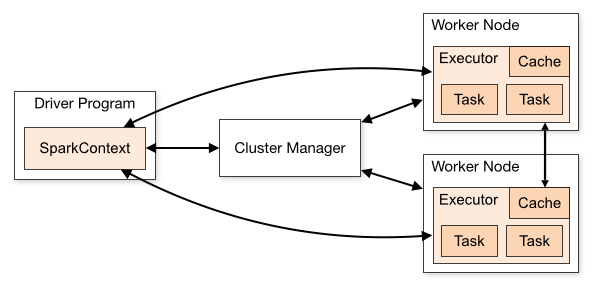

- Note that you can use Spark with Mesos in one of two modes
    - client mode 
    - cluster mode.
- Client mode: A Spark Mesos framework is launched directly on the client machine. It waits for driver ouput.
- Cluster mode: The driver is launched in the cluster. The client can find the results of the driver from the Mesos Web UI.

- Uses standard Mesos install
- Requires Spark binary be available on worker nodes
  - e.g. on HDFS
- Configuration
  -  Set environment variables in spark-env.sh
  - export MESOS_NATIVE_LIBRARY=(path to libmesos.so). or (path to libmesos.dylib) on Mac OS X
  - export SPARK_EXECUTOR_URI=(URL of spark binary file)
  - Set spark.executor.uri to <URL of spark binary file)
- Deploy modes: Client mode and cluster mode


In [ ]:
spark-submit --master mesos://<mesos-host>:5050 \ --conf spark.executor.uri=<URI-of-Spark-binary> \ src/main/python/MyApp.py 1G.data

#### Mesos Run Mode
- fine-grained (default): Each Spark task is a separate Mesos task
   - Multiple Spark instances and other frameworks share machines at a fine granularity
   - Executors scale number of CPUs up/down as they execute tasks
- coarse-grained: One long-running Spark task on each worker and schedule mini-tasks within it
  - Lower startup overhead, but reserves resources for entire life of app
  -  Set spark.mesos.coarse=true to choose this mode

#### Which Manager to Use?
 - Run Spark workers on HDFS nodes with any of the managers
   - For fast data access
- Development / New Deployments: Standalone 
  - Easiest to setup and use
  - Pretty good if only running Spark
- If already running Hadoop 2: YARN – It will be pre-installed
- If fine-grained resource allocation is important: Mesos – Will scale down resource usage when job is less active

#### References:
 - https://medium.com/@goyalsaurabh66/running-spark-jobs-on-yarn-809163fc57e2
 